In [1]:
import pickle
import pandas as pd
import requests
from bs4 import BeautifulSoup
import sys
import os
from collections import defaultdict
import re
import json
from collections import Counter
import dateutil
from dateutil import parser
from collections import defaultdict
from __future__ import division
import datetime
%pylab inline
from numpy import arange
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.options.display.mpl_style = 'default'

Populating the interactive namespace from numpy and matplotlib


In [2]:
def parseint(string):
    string = str(string)
    return int(''.join([x for x in string if x.isdigit()]))

In [3]:
with open('movie_info_revised.p' ,'r') as picklefile:
    data = pickle.load(picklefile)

In [4]:
def date_helper(date):
    try:
        date = parser.parse(date)
        return True
    except: 
        pass
    return False

In [5]:
history_keys_dic = defaultdict(dict)
for key in data.keys():
    if 'Horror' in data[key]['genre']:
        if date_helper(data[key]['date']):
            year = parser.parse(data[key]['date']).year
            history_keys_dic['count'][year]= history_keys_dic['count'].get(year, 0) + 1  
history_df = pd.DataFrame.from_dict(history_keys_dic)
start = pd.datetime(1980, 1, 1)
end = pd.datetime(2016, 1, 1)
x = pd.date_range(start, end, freq='A').year
history_df_years = history_df.reindex(x)
history_df = history_df_years.fillna(0)
history_df['rolling mean']=pd.rolling_mean(history_df['count'], 5).shift(+1)
history_df['difference from mean']=history_df['count']/history_df['rolling mean']

In [6]:
history_keys_dic

defaultdict(<type 'dict'>, {'count': {1972: 6, 1973: 11, 1974: 8, 1975: 6, 1976: 17, 1977: 14, 1978: 18, 1979: 15, 1980: 15, 1981: 18, 1982: 15, 1983: 16, 1984: 11, 1985: 18, 1986: 28, 1987: 29, 1988: 38, 1989: 24, 1990: 28, 1991: 12, 1992: 13, 1993: 15, 1994: 12, 1995: 17, 1996: 13, 1997: 12, 1998: 16, 1999: 15, 2000: 17, 2001: 17, 2002: 22, 2003: 21, 2004: 16, 2005: 30, 2006: 27, 2007: 43, 2008: 43, 2009: 36, 2010: 34, 2011: 29, 2012: 64, 2013: 32, 2014: 5, 2015: 18, 2016: 2}})

In [17]:
history_df

,count,rolling mean,difference from mean
1980,15,NaN,NaN
1981,18,NaN,NaN
1982,15,NaN,NaN
1983,16,NaN,NaN
1984,11,NaN,NaN
1985,18,15.0,1.200000
1986,28,15.6,1.794872
1987,29,17.6,1.647727
1988,38,20.4,1.862745
1989,24,24.8,0.967742


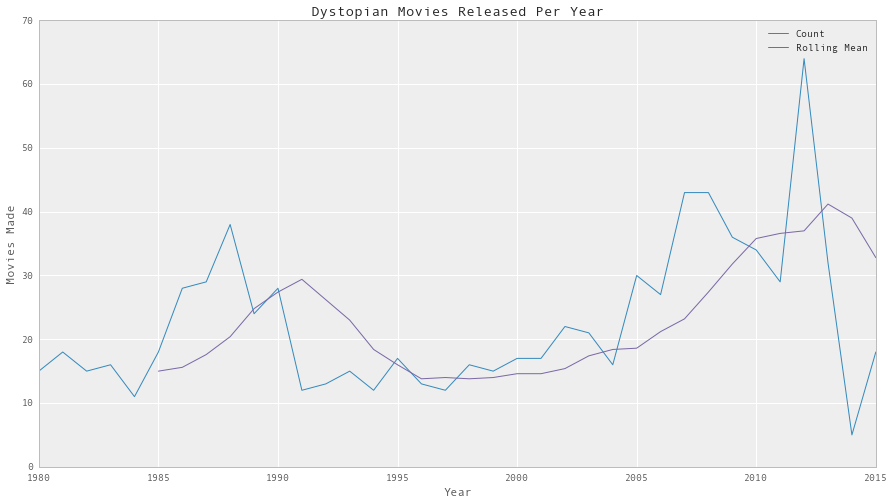

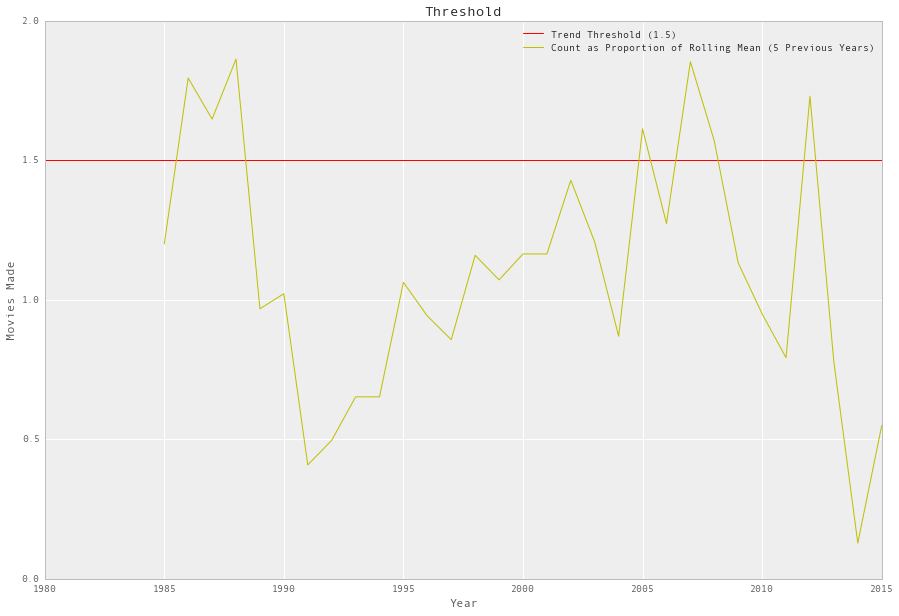

In [18]:
df = history_df.reset_index()
df['cutoff'] = 1.5
count = df['count']
rolling_mean = df['rolling mean']
difference_mean = df['difference from mean']
date = df['index']
cutoff = df['cutoff']
figure(figsize=(15,8))
# red dashes, blue squares and green triangles
count_line = plt.plot(date, count, label=count)
rolling_mean_line = plt.plot(date,rolling_mean, label=rolling_mean)
plt.legend(['Count','Rolling Mean'])
plt.title('Dystopian Movies Released Per Year')
plt.ylabel('Movies Made')
plt.xlabel('Year')
plt.show()

# red dashes, blue squares and green triangles
figure(figsize=(15,10))
count_line = plt.plot(date, cutoff, 'r-', label=count)
rolling_mean_line = plt.plot(date, difference_mean, 'y-', label=count)
plt.legend(['Trend Threshold (1.5)', 'Count as Proportion of Rolling Mean (5 Previous Years)'])
plt.title('Threshold')
plt.ylabel('Movies Made')
plt.xlabel('Year')
plt.show()

In [19]:
history_dic = defaultdict(dict)
for key in data.keys():
    if 'Horror' in data[key]['genre']:
        if date_helper(data[key]['date']):
            year = parser.parse(data[key]['date']).year
            history_dic[year][key]= defaultdict(dict)
            history_dic[year][key]['date']= data[key]['date']
            history_dic[year][key]['screens']= data[key]['screens']
            history_dic[year][key]['opening']= data[key]['opening']
                #space_dic['space'][year].append(key,)

In [20]:
history_dic

defaultdict(<type 'dict'>, {1972: {'Crescendo': defaultdict(<type 'dict'>, {'date': '29 November 1972', 'screens': 'Error', 'opening': 'N/A'}), 'Dracula A.D. 1972': defaultdict(<type 'dict'>, {'date': '17 November 1972', 'screens': 'Error', 'opening': 'N/A'}), "Children Shouldn't Play with Dead Things": defaultdict(<type 'dict'>, {'date': '20 September 1972', 'screens': 'Error', 'opening': 'N/A'}), "Don't Torture a Duckling": defaultdict(<type 'dict'>, {'date': '29 September 1972', 'screens': 'Error', 'opening': 'N/A'}), 'Images': defaultdict(<type 'dict'>, {'date': '18 December 1972', 'screens': 'Error', 'opening': 'N/A'}), 'Asylum': defaultdict(<type 'dict'>, {'date': '17 November 1972', 'screens': 'Error', 'opening': 'N/A'})}, 1973: {'Tales That Witness Madness': defaultdict(<type 'dict'>, {'date': '31 October 1973', 'screens': 'Error', 'opening': 'N/A'}), 'A Thief in the Night': defaultdict(<type 'dict'>, {'date': '22 March 1973', 'screens': 'Error', 'opening': 'N/A'}), 'Scream Bla

In [21]:
def makedf(genre):
    frames = []
    years = []
    for year, movies in genre.items():
        years.append(year)
        frames.append(pd.DataFrame.from_dict(movies, orient='index'))
    genre = pd.concat(frames, keys=years)
    genre = genre[genre.screens != 'N/A']
    genre = genre[genre.screens != 'n/a']
    genre = genre[genre.screens != 'Error']
    genre = genre[genre.opening != 'N/A']
    genre = genre[genre.screens != '']
    genre = genre[genre.opening != '']
    genre = genre[genre.opening != 'n/a']
    genre = genre[genre.opening != 'Error']
    genre['opening'] = genre['opening'].map(lambda x: parseint(x))
    genre['screens'] = genre['screens'].map(lambda x: parseint(x))
    genre['date'] = genre['date'].map(lambda x: parser.parse(x))
    genre['normalized_opening']= genre['opening']/genre['screens']
    genre = genre[genre.normalized_opening < 20000]
    return genre

In [32]:
genre=makedf(history_dic)
pd.set_option('display.max_rows', 1000)
genre1 = genre[genre.screens > 50]
genre1 = genre1.reset_index()
genre1

,level_0,level_1,date,screens,opening,normalized_opening
0,1976,King Kong,1976-12-17,974,7023921,7211.417864
1,1976,The Omen,1976-06-25,515,4273886,8298.807767
2,1977,Exorcist II: The Heretic,1977-06-17,703,6735000,9580.369844
3,1978,Damien: Omen II,1978-06-09,525,3880880,7392.152381
4,1978,Jaws 2,1978-06-16,640,9866023,15415.660938
5,1979,Dracula,1979-07-20,395,3141281,7952.610127
6,1979,The Amityville Horror,1979-07-27,748,7843467,10485.918449
7,1980,Friday the 13th,1980-05-09,1100,5816321,5287.564545
8,1980,The Awakening,1980-10-31,909,2728520,3001.672167
9,1981,An American Werewolf in London,1981-08-21,870,3786512,4352.312644


In [33]:
trend = genre1[309:343]

trend

,level_0,level_1,date,screens,opening,normalized_opening
309,2007,1408,2007-06-22,2678,20617667,7698.904780
310,2007,28 Weeks Later,2007-05-11,2303,9807292,4258.485454
311,2007,30 Days of Night,2007-10-19,2855,15951902,5587.356217
312,2007,Aliens vs. Predator: Requiem,2007-12-25,2611,10059425,3852.709690
313,2007,Blood and Chocolate,2007-01-26,1200,2074300,1728.583333
314,2007,Dead Silence,2007-03-16,1805,7842725,4345.000000
315,2007,Dead Tone,2007-08-24,512,1425915,2784.990234
316,2007,Feast,2007-01-18,146,54556,373.671233
317,2007,Grindhouse,2007-04-06,2624,11596613,4419.440930
318,2007,Hostel: Part II,2007-06-08,2350,8203391,3490.804681


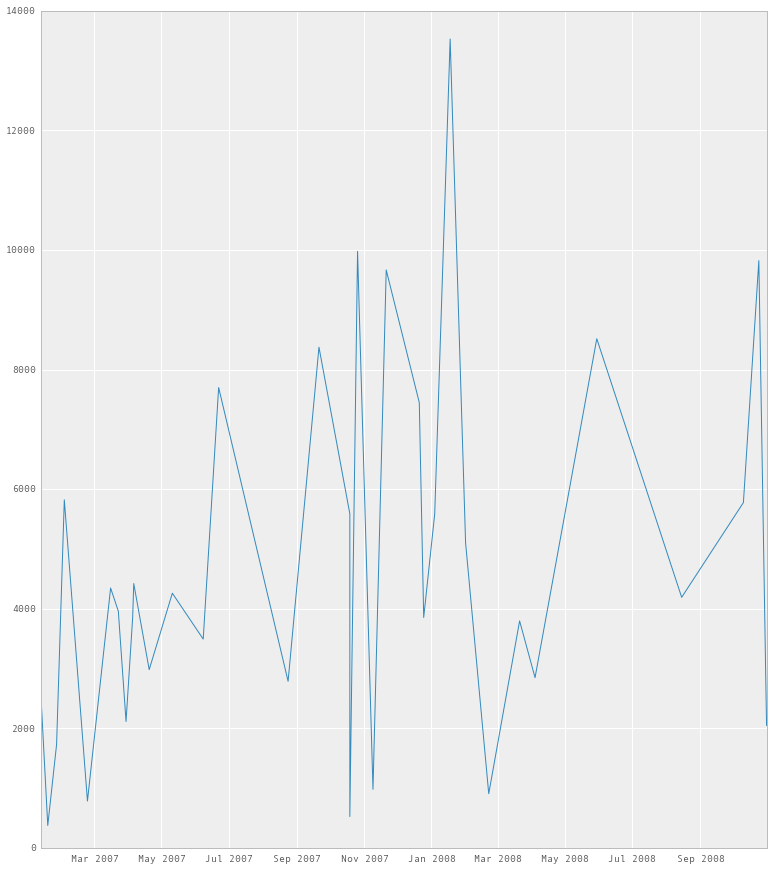

In [34]:
figure(figsize=(13,15))
trend = trend.sort(['date'])
plt.plot(trend['date'], trend['normalized_opening'])

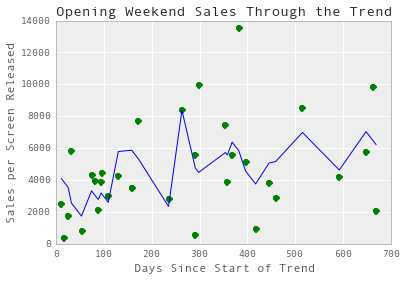

In [35]:
trend['time_delta']=trend['date'].apply(lambda x: str(x - parser.parse('2007-01-01')))
trend['time_delta_num'] = trend['time_delta'].str.replace(r'days[\s\S]+', '').apply(lambda x: int(x))

def sort_season(x):
    if x == 1:
        return 'January'
    if x == 2:
        return 'February'
    if x == 3:
        return 'March'
    if x == 4:
        return 'April'
    if x == 5:
        return 'May'
    if x == 6:
        return 'June'
    if x == 7:
        return 'July'
    if x == 8:
        return 'August'
    if x == 9:
        return 'September'
    if x == 10:
        return 'October'
    if x == 12:
        return 'November'
    if x == 12:
        return 'December'

trend['season']=trend['date'].apply(lambda x: sort_season(x.month))
from patsy import dmatrices
from patsy import dmatrix
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
#plot_data = trend
y, X = dmatrices('normalized_opening ~ time_delta_num + season + level_0', data = trend, return_type= 'dataframe')
model = sm.OLS(y, X)
plt.title('Opening Weekend Sales Through the Trend')
plt.ylabel('Sales per Screen Released')
plt.xlabel('Days Since Start of Trend')
fitted = model.fit()
plot(X['time_delta_num'], y, 'go')
plot(X['time_delta_num'], fitted.fittedvalues, 'b')



In [36]:
model.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     normalized_opening   R-squared:                       0.272
Model:                            OLS   Adj. R-squared:                 -0.129
Method:                 Least Squares   F-statistic:                    0.6784
Date:                Fri, 09 Oct 2015   Prob (F-statistic):              0.743
Time:                        04:26:20   Log-Likelihood:                -296.60
No. Observations:                  32   AIC:                             617.2
Df Residuals:                      20   BIC:                             634.8
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------------
Intercept           -3.249e+07      6e+07     -0.542      0.594     -1.58e+08  9.26e+07
season[T.August]     4650.4831   1.13e+04      0.412      0.685     -1.89e+04  2.82e+04
season[T.February]  -3047.4214   5125.029     -0.595      0.559     -1.37e+04  7643.201
season[T.January]   -2331.2075   7169.463     -0.325      0.748     -1.73e+04  1.26e+04
season[T.June]       5174.0779   6161.382      0.840      0.411     -7678.340   1.8e+04
season[T.March]      -643.5523   2695.644     -0.239      0.814     -6266.568  4979.463
season[T.May]        4004.9402   4475.856      0.895      0.382     -5331.531  1.33e+04
season[T.November]   1.267e+04   2.13e+04      0.594      0.559     -3.18e+04  5.72e+04
season[T.October]    9238.8353   1.62e+04      0.569      0.576     -2.46e+04  4.31e+04
season[T.September]  1.177e+04    1.4e+04      0.841      0.410     -1.74e+04   4.1e+04
time_delta_num        -38.9560     82.039     -0.475      0.640      -210.087   132.175
level_0              1.619e+04   2.99e+04      0.542      0.594     -4.61e+04  7.85e+04
==============================================================================
Omnibus:                        7.036   Durbin-Watson:                   2.247
Prob(Omnibus):                  0.030   Jarque-Bera (JB):                5.381
Skew:                           0.847   Prob(JB):                       0.0679
Kurtosis:                       4.079   Cond. No.                     2.12e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.12e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [27]:
trend = trend.reset_index()
with open('horror1.p', 'w') as picklefile:
    pickle.dump(trend, picklefile)